# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(str(len(cities)) + " " + cities[0] + " " + cities[len(cities)-1])

634 tsihombe boa vista


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
response = requests.get(query_url + cities[3]).json()
response

{'coord': {'lon': 18.61, 'lat': 69.13},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 46.4,
  'feels_like': 34.16,
  'temp_min': 46.4,
  'temp_max': 46.4,
  'pressure': 1013,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 19.46, 'deg': 150},
 'clouds': {'all': 8},
 'dt': 1595809348,
 'sys': {'type': 1,
  'id': 1619,
  'country': 'NO',
  'sunrise': 1595808182,
  'sunset': 1595886051},
 'timezone': 7200,
 'id': 3145649,
 'name': 'Moen',
 'cod': 200}

In [5]:
# set up lists to hold reponse info
city_name = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
record_count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    record_count = record_count + 1
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print("Processing Record " + str(record_count) + " | " + city)  
    except:
        print("Processing Record " + str(record_count) + " | " + city + " not found") 


Processing Record 1 | tsihombe not found
Processing Record 2 | bredasdorp
Processing Record 3 | norman wells
Processing Record 4 | moen
Processing Record 5 | saint simons
Processing Record 6 | coquimbo
Processing Record 7 | ribeira grande
Processing Record 8 | port alfred
Processing Record 9 | mataura
Processing Record 10 | dedza
Processing Record 11 | attawapiskat not found
Processing Record 12 | kuche not found
Processing Record 13 | barentsburg not found
Processing Record 14 | rikitea
Processing Record 15 | yar-sale
Processing Record 16 | zhigansk
Processing Record 17 | curup
Processing Record 18 | barrow
Processing Record 19 | east london
Processing Record 20 | ushuaia
Processing Record 21 | tiksi
Processing Record 22 | sur
Processing Record 23 | srandakan
Processing Record 24 | meyungs not found
Processing Record 25 | amderma not found
Processing Record 26 | ixtapa
Processing Record 27 | southbridge
Processing Record 28 | bathsheba
Processing Record 29 | busselton
Processing Recor

Processing Record 242 | high prairie
Processing Record 243 | palauig
Processing Record 244 | saint george
Processing Record 245 | glendive
Processing Record 246 | skibbereen
Processing Record 247 | valdivia
Processing Record 248 | takoradi
Processing Record 249 | touros
Processing Record 250 | lebanon
Processing Record 251 | pochutla
Processing Record 252 | pathardi
Processing Record 253 | maghama not found
Processing Record 254 | brownsville
Processing Record 255 | kaitangata
Processing Record 256 | road town
Processing Record 257 | monrovia
Processing Record 258 | sola
Processing Record 259 | labuhan
Processing Record 260 | fort saint john not found
Processing Record 261 | samusu not found
Processing Record 262 | karratha
Processing Record 263 | taoudenni
Processing Record 264 | areni
Processing Record 265 | jalu
Processing Record 266 | fonte boa
Processing Record 267 | georgetown
Processing Record 268 | melito di porto salvo
Processing Record 269 | chapais
Processing Record 270 | il

Processing Record 481 | yatou
Processing Record 482 | moron
Processing Record 483 | dingle
Processing Record 484 | mudyuga not found
Processing Record 485 | barbar not found
Processing Record 486 | mahon
Processing Record 487 | chamrajnagar
Processing Record 488 | palu
Processing Record 489 | svitavy
Processing Record 490 | broome
Processing Record 491 | keffi
Processing Record 492 | namibe
Processing Record 493 | komsomolskiy
Processing Record 494 | santa luzia
Processing Record 495 | mayo
Processing Record 496 | darhan
Processing Record 497 | nieuw nickerie
Processing Record 498 | kavieng
Processing Record 499 | baghdad
Processing Record 500 | lemesos not found
Processing Record 501 | progreso
Processing Record 502 | vao
Processing Record 503 | tezu
Processing Record 504 | rawah
Processing Record 505 | kathu
Processing Record 506 | petlawad
Processing Record 507 | moussoro
Processing Record 508 | constantine
Processing Record 509 | lucapa
Processing Record 510 | bodaybo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
city_weather = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng, 
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness, 
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date})
city_weather.count(axis='rows')

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
city_weather.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,42.8,87,15,3.36,ZA,1595809364
1,Norman Wells,65.28,-126.83,71.6,46,75,19.46,CA,1595809365
2,Moen,69.13,18.61,46.4,93,8,19.46,NO,1595809348
3,Saint Simons,31.14,-81.39,86.0,74,20,5.82,US,1595809366
4,Coquimbo,-29.95,-71.34,53.6,81,64,2.24,CL,1595809366


In [8]:
city_weather.to_csv("../output_data/cities_ARD.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,20.600892,19.529949,69.698765,71.886792,48.277873,7.697341,1.595809e+09
std,32.851969,90.339910,14.080593,19.783299,37.133940,5.251938,7.912402e+01
min,-54.800000,-179.170000,30.200000,8.000000,0.000000,0.130000,1.595809e+09
25%,-4.380000,-59.325000,59.030000,61.500000,8.000000,3.380000,1.595809e+09
50%,23.480000,23.600000,71.670000,76.000000,49.000000,6.580000,1.595809e+09
75%,47.570000,105.555000,80.600000,87.000000,83.000000,10.480000,1.595809e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,28.860000,1.595810e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.
# skipping step as none of the cities have humidity over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
# skipping step as none of the cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

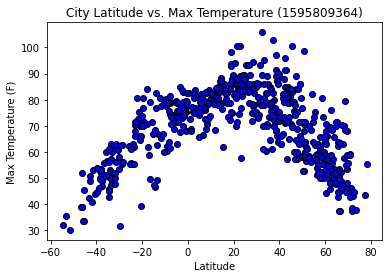

In [10]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

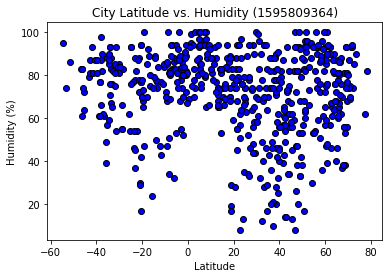

In [11]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

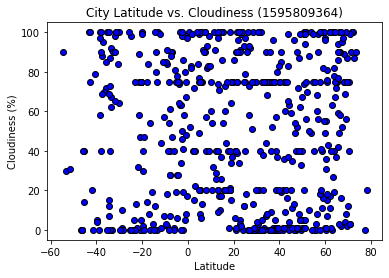

In [12]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

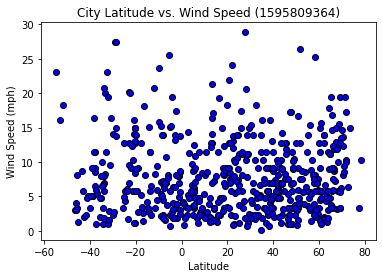

In [13]:
x_axis = city_weather["Lat"]
y_axis = city_weather["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (" + str(city_weather["Date"][0]) + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather[city_weather.Lat > 0]
southern_df = city_weather[city_weather.Lat <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43951268841647523


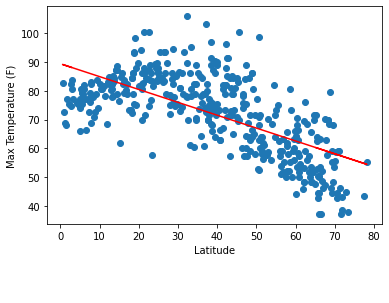

In [16]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6930763225693135


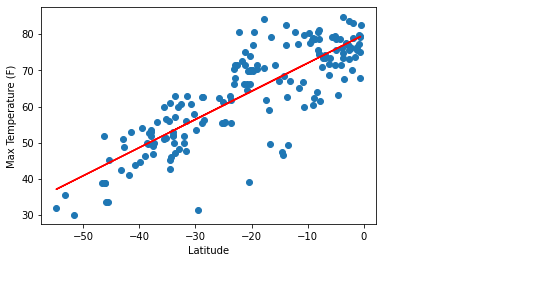

In [17]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012172676803439142


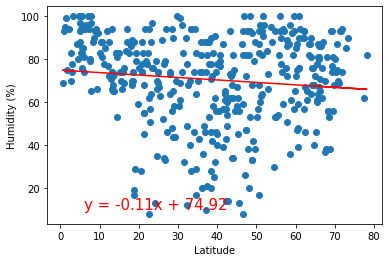

In [18]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00012735289879661492


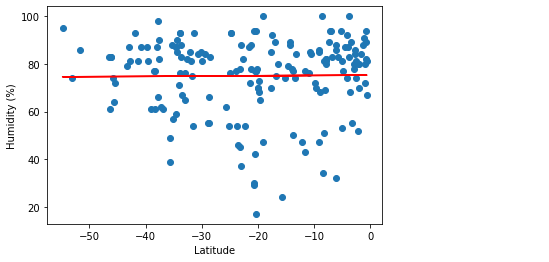

In [19]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007154546244421112


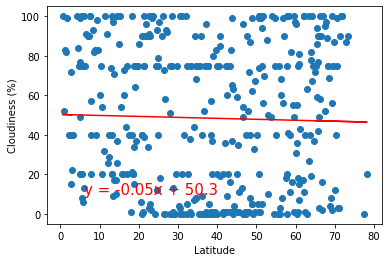

In [20]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00011738925321919329


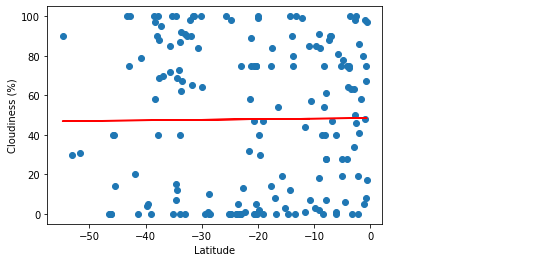

In [21]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012888641079212662


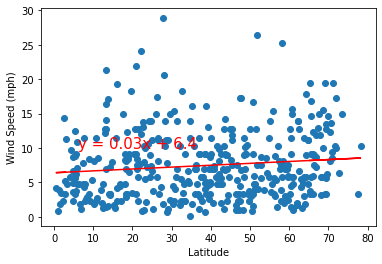

In [22]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0018662420791040434


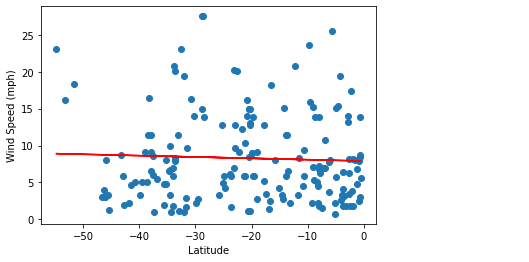

In [23]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#----------------------------------------------------
#----------THREE OBSERVABLE TRENDS-------------------
#----------------------------------------------------
#1. The first and most obvious is the direct correlation to higher temperatures as latitude goes to 0
#2. Cloudiness seems to have a trend with most data points collecting every 20% increase. There are more data points at (20, 40, 60, 80, etc)
#3. Wind speeds seem to lie within the 0-20 MPH range for my data set. There are higher wind speeds but the vast majority are under 20 MPH.